# Dataset 1 : Amazon Echodot (TSV)
In this data set I wanted to see the general view of the echodot's performance. I wanted to see if I
could find any fun trends. I found something interesting on what variation of the echodot is more preferred and which variation of the echodot has a better rating. 

In [12]:
import pandas as pd

In [13]:
amazon_info=pd.read_csv("/Users/rmunix/Documents/School/Econ 213R/amazon_alexa.tsv",sep="\t")

To get a better idea of our data, I did a summary to see how many observations I had.

In [85]:
# dataset summary this is important to help us see our count and the average rating for the echodot
amazon_info.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


I wanted to see what type of data I was working with so I did the following:

In [63]:
# see main info of dataset, this is important to help us see what variables are numerical or string 
amazon_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
rating              3150 non-null int64
date                3150 non-null object
variation           3150 non-null object
verified_reviews    3150 non-null object
feedback            3150 non-null int64
dtypes: int64(2), object(3)
memory usage: 123.1+ KB


I noticed that I had some blank spots for people that did not comment on their echodot review so I wanted to clean that up a bit and just put, "No comment" on those missing spots.

In [92]:
# We replace missing data in the review with the string 'No comment' this helps us clean the data more
df = amazon_info['verified_reviews']
df.replace(r'^\s+$', 'No comment',regex=True)

0                                           Love my Echo!
1                                               Loved it!
2       Sometimes while playing a game, you can answer...
3       I have had a lot of fun with this thing. My 4 ...
4                                                   Music
5       I received the echo as a gift. I needed anothe...
6       Without having a cellphone, I cannot use many ...
7       I think this is the 5th one I've purchased. I'...
8                                             looks great
9       Love it! I’ve listened to songs I haven’t hear...
10      I sent it to my 85 year old Dad, and he talks ...
11      I love it! Learning knew things with it eveyda...
12      I purchased this for my mother who is having k...
13                                     Love, Love, Love!!
14                               Just what I expected....
15                              I love it, wife hates it.
16      Really happy with this purchase.  Great speake...
17      We hav

I was interested then to see how many variations of the echodot existed and how much of each variation was represented in the data.

In [26]:
# see all variations and their counts
amazon_variation = amazon_info['variation'].value_counts()
print (amazon_variation)

Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
White                            91
Sandstone Fabric                 90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: variation, dtype: int64


In [41]:
#see first 5 total of each echo dot variation
amazon_variation.head()

Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Name: variation, dtype: int64

In [56]:
#import visuals
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='ticks', palette='Set2')
%matplotlib inline

# Visual 1
In this visual we can see the average rating for each variation of echodot. From the data we could argue that the walnut finish and oak finish seem to perform at the best rating.

Text(0.5, 1.0, 'Variations compared to Ratings')

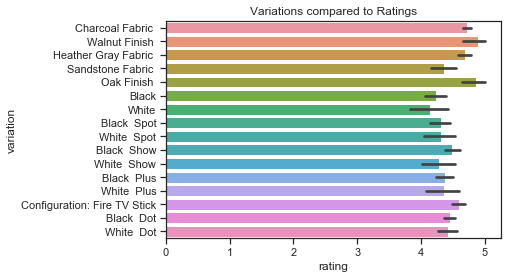

In [186]:
# Dataset barplot ratings compared to variation, this lets us see what variation of the echodot has the highest ratings
#(note that there is not the same amount of echodot reviews for each variation so the data might not show true relationship)
sns.barplot(amazon_info.rating, amazon_info.variation)
plt.title('Variations compared to Ratings')

# Visual 2
Here I made a general visual to display what are the overal ratings of echodots. From looking at the data we can conclude that overall echodots are performing well.

Text(0.5, 1.0, 'Overall Echodot Ratings')

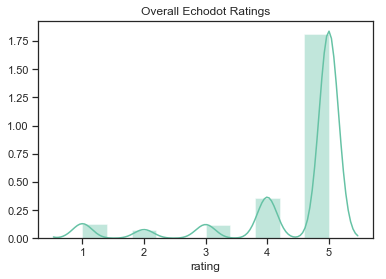

In [184]:
# Echodot overall ratings, this helps us see consumer's opinion on overal performance of the echodot
sns.distplot(amazon_info.rating, kde=True, bins=10)
plt.title('Overall Echodot Ratings')

# Dataset 2 : Fortnite (Datascraping)
In this dataset I was interested to make my own leaderboard of the first 100 players who play the game fortnite, but with some alterations. If you have the most kills and the least amount of matches, in my opinion, that makes you the best player. I also wanted to see if the player Ninja (according to dudeperfect is the best player on fortnite) still was at the top.

In [161]:
# read in html
import urllib.request
from bs4 import BeautifulSoup

url = 'https://fortnitetracker.com/leaderboards'

req = urllib.request.Request(
    url, 
    data=None, 
    headers={
        'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.1916.47 Safari/537.36'
    }
)

page = urllib.request.urlopen(req)

soup = BeautifulSoup(page, 'lxml')

table = soup.find_all('table')[0] 
fortnite_100 = pd.read_html(str(table))[0]

print (fortnite_100)

    Rank            Player  Wins  Matches
0      1             Ninja  5158    14269
1      2    TTV.Uwatakashi  4961    13433
2      3        WBG Ranger  4862    14852
3      4     Twitch-Ettnix  4746    11780
4      5  twitchtv eXzacT7  4723     9701
5      6   Twitch_PuZiiyoジ  4598     9461
6      7       E11 BlooTea  4597    13423
7      8      JohnPitterTV  4535    15926
8      9          Svennoss  4372    12213
9     10              Dark  4339    15653
10    11   QUASAR Luanzera  4298    10643
11    12          TQQ Uniq  4227    14397
12    13     MiTH_Chambers  4190     9737
13    14  TwitchProspering  4106    11573
14    15         ItsWiKKiD  4086    10125
15    16   cRaBBLe McShiet  4061     6618
16    17   RiskyUnicornTTV  3884     6655
17    18       Fnatic_Jαrl  3870    10222
18    19          SypherPK  3825    12838
19    20    ANL-WillzonePH  3795    14696
20    21           MrDoom.  3792     7787
21    22  QLASH CrimiKevin  3768     7995
22    23        nixxxay TV  3745  

I did this to see my data in general. Nothing too important but gave me a quick snapshot

In [162]:
# display data
fortnite_100.head(5)

,Rank,Player,Wins,Matches
0,1,Ninja,5158,14269
1,2,TTV.Uwatakashi,4961,13433
2,3,WBG Ranger,4862,14852
3,4,Twitch-Ettnix,4746,11780
4,5,twitchtv eXzacT7,4723,9701


So I realized that I was missing some data that was essential for what I wanted to find. Specifically the win to matches ratio.

In [163]:
# add new column that tells us what the win to matches ratio is
fortnite_100['wins_to_matches']= fortnite_100['Wins'].divide(fortnite_100['Matches'],fill_value=1)

The assignment requires that I do some datacleaning for each dataset so I added a column that I didnt really need and then deleted it.

In [170]:
# add new column that could be unrelated data that can be removed so that I have fulfilled data cleaning in this dataset
fortnite_100['fault_data']= fortnite_100['Wins'].divide(fortnite_100['Rank'],fill_value=1)

To see what the results that I was looking for and to see if ninja was still on the top I sorted the data based on the new column I made wins_to_matches.

In [171]:
# sort data based on wins to matches ratio, greatest to least
fortnite_100.sort_values('wins_to_matches', ascending=False)

,Rank,Player,Wins,Matches,wins_to_matches,fault_data
15,16,cRaBBLe McShiet,4061,6618,0.613629,253.812500
16,17,RiskyUnicornTTV,3884,6655,0.583621,228.470588
20,21,MrDoom.,3792,7787,0.486965,180.571429
4,5,twitchtv eXzacT7,4723,9701,0.486857,944.600000
43,44,twitchstonde1337,3348,6882,0.486486,76.090909
5,6,Twitch_PuZiiyoジ,4598,9461,0.485995,766.333333
28,29,Aêrøeu,3594,7456,0.482028,123.931034
63,64,Solary Kinstaar,3118,6554,0.475740,48.718750
21,22,QLASH CrimiKevin,3768,7995,0.471295,171.272727
33,33,NYYRIKKI Mikkis,3572,7752,0.460784,108.242424


In [172]:
# Data cleaning take fault data out of dataset to fulfill datacleaning requirement for dataset
fortnite_100.pop('fault_data')

0     5158.000000
1     2480.500000
2     1620.666667
3     1186.500000
4      944.600000
5      766.333333
6      656.714286
7      566.875000
8      485.777778
9      433.900000
10     390.727273
11     352.250000
12     322.307692
13     293.285714
14     272.400000
15     253.812500
16     228.470588
17     215.000000
18     201.315789
19     189.750000
20     180.571429
21     171.272727
22     162.826087
23     152.875000
24     144.720000
25     138.961538
26     133.703704
27     128.571429
28     123.931034
29     119.633333
         ...     
70      43.014085
71      42.333333
72      41.630137
73      40.945946
74      40.280000
75      39.710526
76      39.181818
77      38.564103
78      37.936709
79      37.936709
80      36.987654
81      36.475610
82      35.975904
83      35.500000
84      35.070588
85      34.406977
86      33.896552
87      33.363636
88      32.966292
89      32.588889
90      32.588889
91      31.804348
92      31.333333
93      30.925532
94      30

In [174]:
fortnite_100.head()

,Rank,Player,Wins,Matches,wins_to_matches
0,1,Ninja,5158,14269,0.361483
1,2,TTV.Uwatakashi,4961,13433,0.369314
2,3,WBG Ranger,4862,14852,0.327363
3,4,Twitch-Ettnix,4746,11780,0.402886
4,5,twitchtv eXzacT7,4723,9701,0.486857


In [173]:
# Doesn't really tell us anything because this incorporates all the players
fortnite_100.describe()

,Rank,Wins,Matches,wins_to_matches
count,100.000000,100.00000,100.00000,100.000000
mean,50.450000,3436.29000,10522.67000,0.342885
std,28.997518,548.75947,2641.56364,0.083991
min,1.000000,2864.00000,6541.00000,0.189468
25%,25.750000,3020.25000,8672.75000,0.286993
50%,50.500000,3208.00000,9894.50000,0.336397
75%,75.250000,3614.25000,12359.75000,0.402454
max,100.000000,5158.00000,18256.00000,0.613629


# Visuals
This plot shows us that amoung the top 100 players most are found within the area that represents higher wins to matches ratio (bottom left corner). Something interesting to note is Ninja (the best player in the world is the outlier furthest up on wins).

Text(0.5, 1.0, 'Game Wins compared to Game Matches')

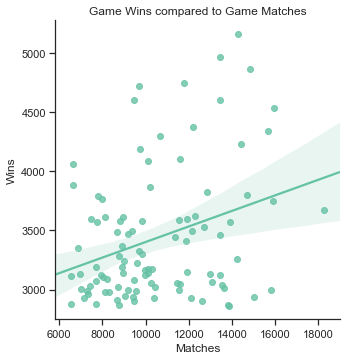

In [182]:
# Did this to see visually if there was a correlation of wins to matches of the top ranked players
sns.lmplot(x="Matches",y="Wins", data=fortnite_100)
plt.title('Game Wins compared to Game Matches')

# Dataset 3: Major Soccer Leagues (API) 
I love soccer so I went to see if I could find an API that would give me stats that I could work with. I wanted to get a general stats list that I could do some visuals on. 

In [175]:
import http.client 
import json
import pandas as pd
from pandas.io.json import json_normalize #package for flattening json in pandas df

# Setup connection to API 
connection = http.client.HTTPConnection('api.football-data.org')
# Add the API Key for request
headers = { 'X-Auth-Token': '4258855c6b8e4bd9bbf5e3c5b9acecae' }
# Make request
connection.request('GET', '/v2/competitions/2021/standings?season=2017', None, headers )
# Read the response 
response = json.loads(connection.getresponse().read().decode())
# Load the data from the JSON response, We load standings -> first object -> table array
soccer_stats = json_normalize(response['standings'][0]['table'])

soccer_stats.head()

,draw,goalDifference,goalsAgainst,goalsFor,lost,playedGames,points,position,team.crestUrl,team.id,team.name,won
0,4,79,27,106,2,38,100,1,https://upload.wikimedia.org/wikipedia/en/e/eb...,65,Manchester City FC,32
1,6,40,28,68,7,38,81,2,http://upload.wikimedia.org/wikipedia/de/d/da/...,66,Manchester United FC,25
2,8,38,36,74,7,38,77,3,http://upload.wikimedia.org/wikipedia/de/b/b4/...,73,Tottenham Hotspur FC,23
3,12,46,38,84,5,38,75,4,http://upload.wikimedia.org/wikipedia/de/0/0a/...,64,Liverpool FC,21
4,7,24,38,62,10,38,70,5,http://upload.wikimedia.org/wikipedia/de/5/5c/...,61,Chelsea FC,21


I did some data cleaning here and took out draws and the url's that got the data from

In [176]:
#Datacleaning not really interested in the data for "draws" so I pulled it out
soccer_stats.pop('draw')

0      4
1      6
2      8
3     12
4      7
5      6
6     12
7     10
8     11
9      8
10    11
11    11
12    12
13     8
14    13
15    10
16    15
17     9
18    12
19    13
Name: draw, dtype: int64

In [178]:
# Datacleaning dont need where I got the information from.
soccer_stats.pop('team.crestUrl')

0     https://upload.wikimedia.org/wikipedia/en/e/eb...
1     http://upload.wikimedia.org/wikipedia/de/d/da/...
2     http://upload.wikimedia.org/wikipedia/de/b/b4/...
3     http://upload.wikimedia.org/wikipedia/de/0/0a/...
4     http://upload.wikimedia.org/wikipedia/de/5/5c/...
5     http://upload.wikimedia.org/wikipedia/en/5/53/...
6     https://upload.wikimedia.org/wikipedia/en/0/02...
7     http://upload.wikimedia.org/wikipedia/de/f/f9/...
8     http://upload.wikimedia.org/wikipedia/en/6/63/...
9     http://upload.wikimedia.org/wikipedia/de/5/56/...
10    http://upload.wikimedia.org/wikipedia/de/b/bf/...
11    https://upload.wikimedia.org/wikipedia/de/4/41...
12    http://upload.wikimedia.org/wikipedia/de/e/e0/...
13    https://upload.wikimedia.org/wikipedia/en/e/e2...
14    https://upload.wikimedia.org/wikipedia/en/f/fd...
15    https://upload.wikimedia.org/wikipedia/en/5/5a...
16    http://upload.wikimedia.org/wikipedia/de/c/c9/...
17    http://upload.wikimedia.org/wikipedia/de/a

In [179]:
# checked to see if the data that I didnt want was pulled out and it was.
soccer_stats.head()

,goalDifference,goalsAgainst,goalsFor,lost,playedGames,points,position,team.id,team.name,won
0,79,27,106,2,38,100,1,65,Manchester City FC,32
1,40,28,68,7,38,81,2,66,Manchester United FC,25
2,38,36,74,7,38,77,3,73,Tottenham Hotspur FC,23
3,46,38,84,5,38,75,4,64,Liverpool FC,21
4,24,38,62,10,38,70,5,61,Chelsea FC,21


# Visuals
Here I just did an obvious correlation between wins and points. Here we see that the most wins has a positive correlation with points.

Text(0.5, 1.0, 'Correlation between points and wins')

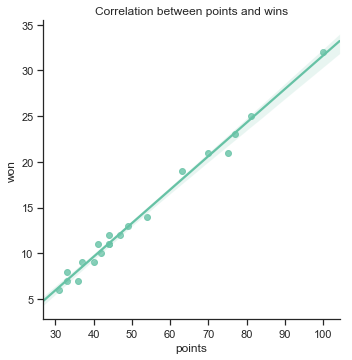

In [183]:
# Did this to see visually if there was a correlation of wins to matches of the top ranked players
sns.lmplot(x="points",y="won", data=soccer_stats)
plt.title('Correlation between points and wins')